In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split

In [66]:
def get_data():
    data=load_svmlight_file('housing_scale')
    return data[0].todense(),data[1]
X,y=get_data()
y=np.reshape(y,(len(y),1))

In [67]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
(n,m)=np.shape(X_train)
X_train=np.hstack((X_train,np.ones((n,1))))   
(n,m)=np.shape(X_test)
X_test=np.hstack((X_test,np.ones((n,1))))

In [105]:
(n,m)=np.shape(X_test)
w=np.zeros((m,1))
# 开始迭代
epco=400          
times=range(epco)
loss_test=[]
loss_train=[]             
alpha=0.001                   
def squareloss(X,w,y):    
    y_predict=X*w         
    s=0
    for i in range(0,len(y)):        
        s=s+(y_predict[i]-y[i])**2
    return s/(len(y))

In [106]:
def gradient(X,w,y,lam=0):     
    grad=lam*w+X.T*(X*w-y)
    return grad

In [107]:
def LinearRegression(X,y,w,lamda,epco,xa,ya,gradient=gradient,loss=squareloss):
    grad=0
    loss_train=[]
    loss_test=[]
    for i in range(epco):
        grad=gradient(X,w,y,lamda)            
        w=w-alpha*grad                            
        loss_train.append(loss(X,w,y)[0,0])   
        loss_test.append(loss(xa,w,ya)[0,0])      
    return loss_train,loss_test

loss_train,loss_test=LinearRegression(X=X_train,y=y_train,w=w,lamda=0,epco=epco,xa=X_test,ya=y_test)

print(loss_train[-1])
print(loss_test[-1])


22.5492560446
21.6252587159


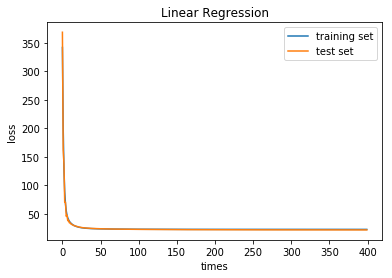

In [108]:
plt.xlabel('times')
plt.ylabel('loss')
plt.title("Linear Regression")
plt.plot(times,loss_train,label='training set')
plt.plot(times,loss_test,label='test set')
plt.legend()
plt.show()